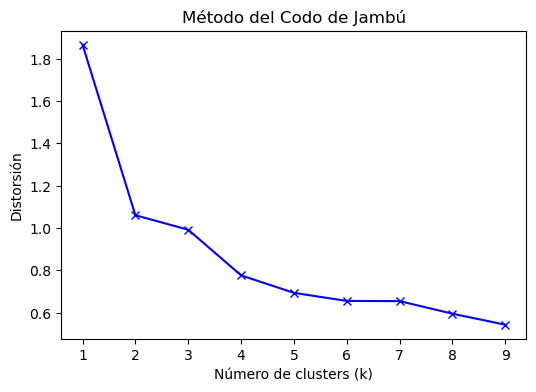

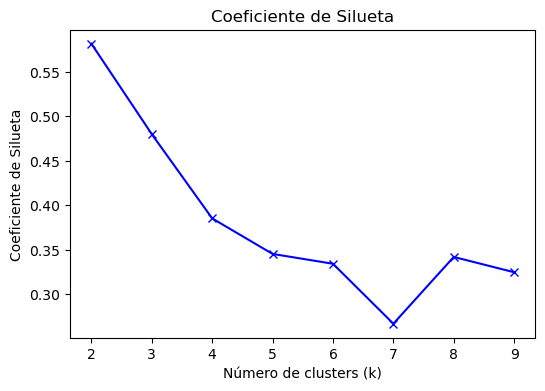

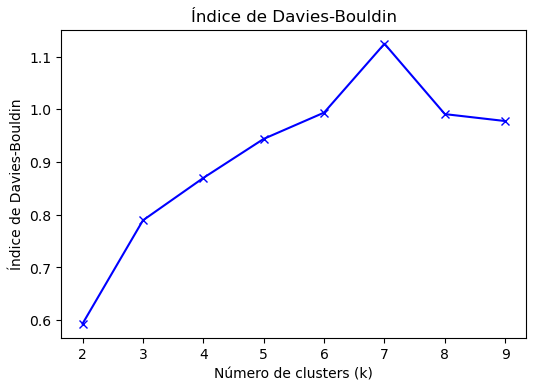

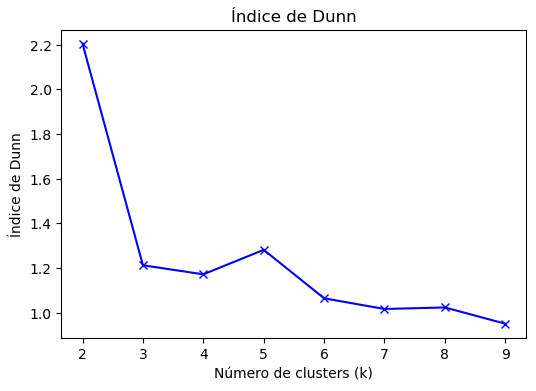

In [2]:
# Instalar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist
import warnings 
# Para ocultar los warnings de la gestion de memoria del kmeans
warnings.filterwarnings("ignore", category=UserWarning)

# Cargar el dataset de Iris
iris = load_iris()
X = iris.data

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Método del Codo de Jambú
def plot_elbow_method(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo de Jambú')
    plt.show()

# 2. Coeficiente de Silueta
def plot_silhouette_scores(X):
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Coeficiente de Silueta')
    plt.show()

# 3. Índice de Davies-Bouldin
def plot_davies_bouldin_scores(X):
    db_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        db_scores.append(davies_bouldin_score(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, db_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Davies-Bouldin')
    plt.title('Índice de Davies-Bouldin')
    plt.show()

# 4. Índice de Dunn
def calculate_dunn_index(X, labels):
    distances = cdist(X, X, metric='euclidean')
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in range(np.max(labels) + 1):
        points_in_cluster = np.where(labels == i)[0]
        if len(points_in_cluster) > 1:
            intra_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster, points_in_cluster)]))

    for i in range(np.max(labels) + 1):
        for j in range(i + 1, np.max(labels) + 1):
            points_in_cluster_i = np.where(labels == i)[0]
            points_in_cluster_j = np.where(labels == j)[0]
            inter_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster_i, points_in_cluster_j)]))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

def plot_dunn_index(X):
    dunn_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        dunn_scores.append(calculate_dunn_index(X, kmeans.labels_))
    plt.figure(figsize=(6, 4))
    plt.plot(K, dunn_scores, 'bx-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Dunn')
    plt.title('Índice de Dunn')
    plt.show()

# Ejecutar las funciones y mostrar gráficos
plot_elbow_method(X_scaled)
plot_silhouette_scores(X_scaled)
plot_davies_bouldin_scores(X_scaled)
plot_dunn_index(X_scaled)
